<a href="https://colab.research.google.com/github/optichkina/HomeworksGB/blob/libs_for_python/RealEstatePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


Задача: 
предсказать цены на квартиры

In [5]:
data=pd.read_csv('sample_submission.csv')
data.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [7]:
test=pd.read_csv('test.csv')
data.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [127]:
train=pd.read_csv('train.csv')
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [128]:
train.info() #информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [105]:
train   #обзор

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [106]:
train.shape

(10000, 20)

In [107]:
train.describe(include='all')   #обобщенные статистики по датасету

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9903,9725,NaN,NaN,NaN,NaN,NaN,NaN,9175,NaN
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,NaN,NaN,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,NaN,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,NaN,NaN,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,NaN,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,NaN,NaN,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,NaN,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,NaN,NaN,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,NaN,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,NaN,NaN,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,NaN,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,NaN,NaN,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,NaN,249135.462171


### Анализ данных

In [108]:
#id переводим в формат str, для исключения влияния на обучение модели
train['Id'] = train['Id'].astype(str)

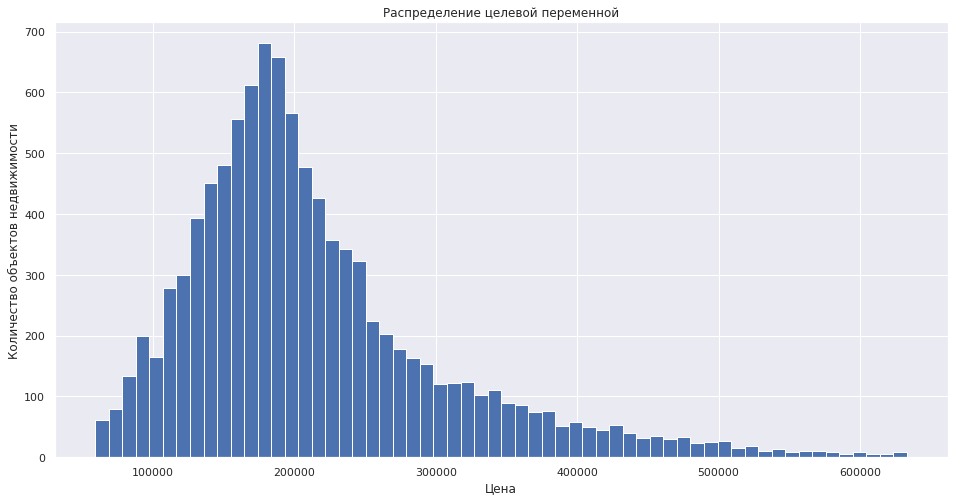

In [109]:
#оценка целевой переменной (цена) с помощью построения гистограммы
plt.figure(figsize = (16,8))
train['Price'].hist(bins= 60)
plt.xlabel('Цена')
plt.ylabel('Количество объектов недвижимости')
plt.title('Распределение целевой переменной')
plt.show()

In [110]:
#медиана и среднее цены
price=train['Price']
price_sort = sorted(price)
median = np.quantile(price_sort, q=0.5).round(3)
mean = np.mean(price_sort).round(3)
print(median)
print(mean)

192269.645
214138.857


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


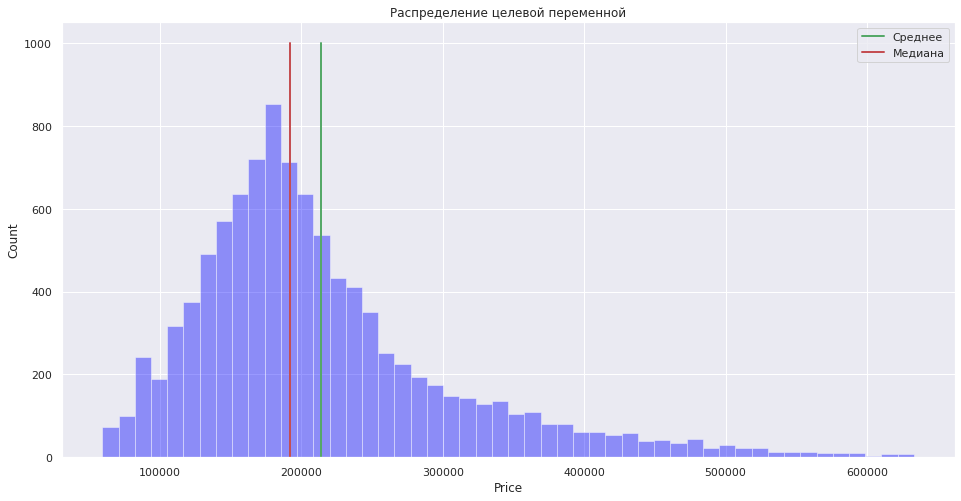

In [111]:
plt.figure(figsize = (16, 8))

sns.set(font_scale=1)
sns.distplot(price_sort, color='blue', bins=50, kde=False)

y = np.linspace(0, 1000, 10)
plt.plot([mean] * 10, y, label='Среднее',  linewidth=2, color='g')
plt.plot([median] * 10, y, label='Медиана',  linewidth=2, color='r')

plt.title('Распределение целевой переменной')
plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()
plt.show()

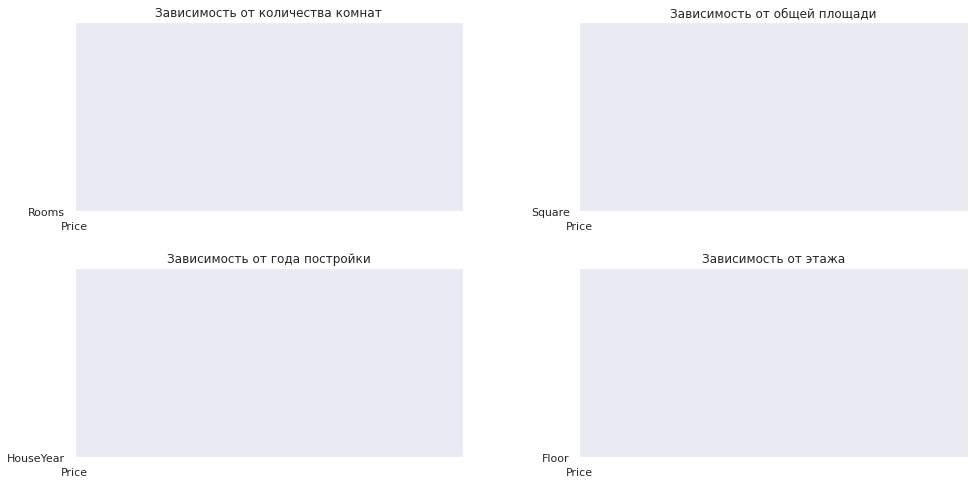

In [112]:
#оценка зависимости целевой переменной от различных факторов
fig, ax = plt.subplots(nrows=2, ncols=2)                                  
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(['Price'], ['Rooms'])
ax1.set_title('Зависимость от количества комнат')
ax1.set_xlim([0, 600000])  
ax1.set_ylim([0,10])                                                 
ax2.plot(['Price'], ['Square'])
ax2.set_title('Зависимость от общей площади')
ax2.set_xlim([0, 600000])  
ax2.set_ylim([0,200]) 
ax3.plot(['Price'], ['HouseYear'])
ax3.set_title('Зависимость от года постройки')
ax3.set_xlim([0, 600000])  
ax3.set_ylim([0,2030]) 
ax4.plot(['Price'], ['Floor'])
ax4.set_title('Зависимость от этажа')
ax4.set_xlim([0, 600000])  
ax4.set_ylim([0,300]) 
fig.set_size_inches(16, 8)                                               
plt.subplots_adjust(wspace=0.3, hspace=0.3)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c4c5d9950>,
      dtype=object)

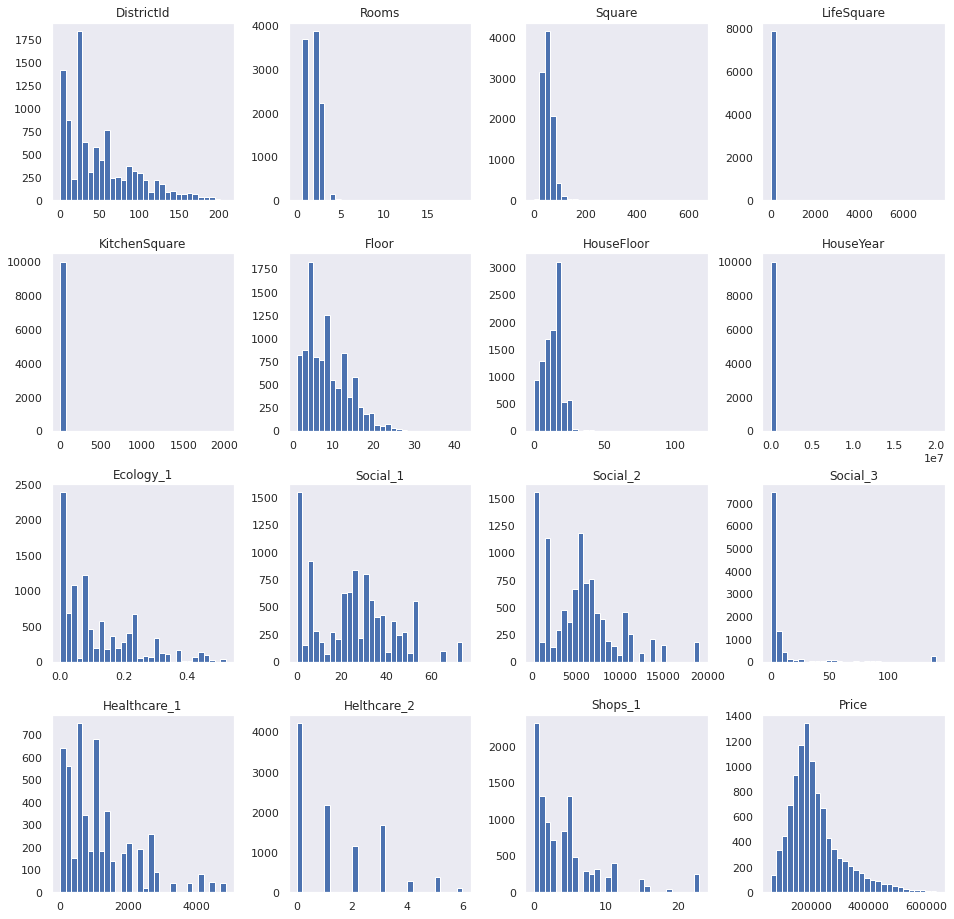

In [113]:
train.hist(figsize= (16,16), bins = 30, grid=False)

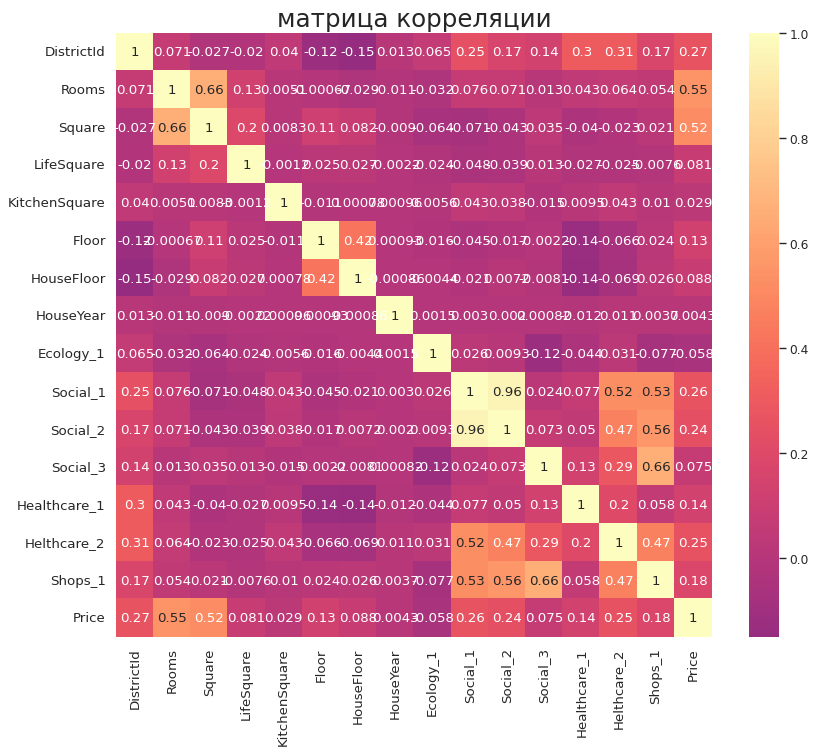

In [114]:
plt.figure(figsize=(12,10), dpi= 80)               #построение матрицы корреляции
sns.heatmap(train.corr(), xticklabels=train.corr().columns, yticklabels=train.corr().columns, cmap='magma', center=0, annot=True)

# Decorations
plt.title('матрица корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [115]:
train.isna().sum()        #поиск незаполненых значений. большое количество незаполненых значений в LifeSquare и Healthcare_1. т.к. у нас всего 10000 наблюдений количество пропусков в обоих случаях значительное.

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [116]:
train['Square'].value_counts()

26.553188     1
46.363496     1
100.751999    1
70.726600     1
40.523022     1
             ..
76.481158     1
86.915187     1
82.482521     1
43.112986     1
97.664912     1
Name: Square, Length: 10000, dtype: int64

In [117]:
#заполняем неизвестные значения жилой площади используя среднюю общую площадь и среднюю площадь кухни (разница между ними будет являться жилой площадью)
train['Square'].mean()

56.315775197935615

In [118]:
train['KitchenSquare'].mean()

6.2733

In [119]:
new_ls= train['Square'].mean() - train['KitchenSquare'].mean()
print(new_ls)

50.042475197935616


In [130]:
train.loc[train['LifeSquare'].isna(), 'LifeSquare'] = new_ls
                               

In [131]:
train['LifeSquare'].value_counts()

50.042475    2113
28.003539       1
49.942477       1
25.688943       1
44.662105       1
             ... 
40.734262       1
37.980219       1
17.130385       1
33.273700       1
28.421652       1
Name: LifeSquare, Length: 7888, dtype: int64